# Optimization using Genetic Algorithms
## Optimization
![opt_image](optimization.png "Optimization")
* Finding best parameters of a model that will yield best scores i.e accuracies(for classification) or losses(for regression tasks). 
* Different kind of optimization algorithms exists eg constrained, multi-objective, multimodal and combinatorial. 


## Evolutionary Algorithms
![ea_image](EA.png "Evolutionary Algorithms")
* Optimization algorithms that exist dynamically. 
* Pivotal in dynamic programming. 
* Examples include Genetic algorithms and monte-carlo simulations. 

### Characteristics of Evolutionary Algorithms. 
* Driving factor is survival for the fittest. Emphasis on survival and fittest. 
* **Population based**: These algorithms optimize existing poor solutions to generate better solutions. Such solutions are known as populations. 
* **Fitness oriented** : A fitness value is used distinguish an outstanding solution from other solutions in the population. Can be thought of as a "metric" for the population. 
* **Variation driven**: New solutions are obtained from existing solutions through variations. Variations help distinguish one set of solution(off spring generation) from the previous set of solutions(parent generation)

## Genetic Algorithms. 
![ga_img](GA.jpg "Genetic Algorithm")
* A type of EA that is random-based. 
* **Why random?** Since variations in the algorithm are introduced randomly instead of deterministically. 
* Variations in GAs are largely driven by Darwinian theory. 

### How do Genetic Algorithms Work?
1. We start with a set of solutions which we call population. 
2. Each solution is called an individual/chromosome.
3. Each chromosome has a set of features which define it's characteristics. These are basically genes. 
4. A population is therefore a collection of chromosomes and a chromosome is a collection of genes. 
5. Our objective will be to optimize these genes such that we end up with chromosomes/individuals with the best value/fitness. Essentially we want to optimize the genetic structure of chromosomes.
### How?
![flow_chart](GA_flow_chart.png "GA_Flowchart")
* Every chromosome has an associated fitness value. The objective in GA is to select the best values from the possible set of values. 
* Therefore, just like in natural environments where the best organisms are selected by nature and allowed to reproduce, chromosomes in the existing population with the best scores are selected for the mating pool. 
* In the mating pool, the selected parents(chromosomes with best fitness values) are combined to produce offspring. In GAs, this process is designed such that it strengthens strong traits among the parents while diminishing poor traits? Can you tell how?
* To further differentiate offspring from their parents, variations are introduced to the offspring through processes such as cross-over and mutation. 
* **Cross-over**: 1/2 of genetic composition from each parent is combined to form a new offspring(assuming we have two mating parents)
* **Mutation**: the process of introducing a change into the genetic structure of a chromosoome. Can be as simple as using binary "flipping" i.e changing 0s to 1s and vice versa or as complex as performing permutations on the genes. 


In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from scipy.linalg import pinv2, inv
import time
import numpy as np
import multiprocessing as mp
import pickle

In [2]:
windows_10_df = pd.read_csv('windows10_dataset.csv')
windows_10_df.head(2)

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_C2_ransitions_sec,Processor_pct_ Privileged_Time,Processor_C3_ransitions_sec,Processor_DPCs_Queued_sec,Processor_Interrupts_sec,Process_Pool_Paged Bytes,Process_IO Read_Operations_sec,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_IO_Write Operations_sec,Process_Page_File Bytes,Process_pct_ User_Time,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_IO_Other_Bytes_sec,Process_Private_Bytes,Process_IO_Write_Bytes_sec,Process_Elapsed_Time,Process_Virtual_Bytes,Process_pct_ Processor_Time,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_Page Faults_sec,Process_ID Process,Process_IO Other Operations_sec,Process_IO Data Operations_sec,Process_Thread Count,Process_pct_ Privileged_Time,Process_IO Data Bytes_sec,Process_IO Read Bytes_sec,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Bytes Received sec,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Bytes Total sec,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) TCP RSC Exceptions sec,Network_I(Intel R _82574L_GNC) Packets Sent Unicast sec,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Packets Received sec,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) Packets sec,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Packets Sent sec,Network_I(Intel R _82574L_GNC) Packets Received Unicast sec,Network_I(Intel R _82574L_GNC) Packets Sent Non-Unicast sec,Network_I(Intel R _82574L_GNC) Packets Received Non-Unicast sec,Network_I(Intel R _82574L_GNC) TCP RSC Coalesced Packets sec,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Transition Pages RePurposed sec,Memory Pages Output sec,Memory Page Reads sec,Memory Demand Zero Faults sec,Memory Available KBytes,Memory Pages sec,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory Page Faults sec,Memory Transition Faults sec,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory Page Writes sec,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,LogicalDisk(_Total) Avg Disk Bytes Write,LogicalDisk(_Total) pct_ Idle Time,LogicalDisk(_Total) Disk Reads sec,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Disk Read Bytes sec,LogicalDisk(_Total) Avg Disk sec Read,LogicalDisk(_Total) Disk Writes sec,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Split IO Sec,LogicalDisk(_Total) Free Megabytes,LogicalDisk(_Total) Avg Disk sec Write,LogicalDisk(_Total) Disk Bytes sec,LogicalDisk(_Total) Avg Disk Read Queue Length,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_

In [3]:
windows_10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35975 entries, 0 to 35974
Columns: 127 entries, ts to type
dtypes: float64(5), int64(52), object(70)
memory usage: 34.9+ MB


In [4]:
features = windows_10_df.drop(columns=['ts', 'type'], axis=1)

In [5]:
numeric_features = features.select_dtypes(exclude=['object'])
numeric_features.head(2)

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,4,15446344,1185267712,5639348224,2536640512,1.120000e+14,9375539200,2536640512,0,1.120000e+14,0,2447032,1319534592,0,789,0,29996,0,0,0,0,0,0,1000000000,0,0,0,284635136,4018176,815652864,1466368,261980160,6444666880,255840,18944000,89763840,0,48,5668864,3825664,157052928,2957312.0,95240192,164783,122023,53.693804,12229087,249,962560,3460386816,17117184,83619840,82.156219,0,167984,0
1,9,15448880,1188397056,5639348224,2535768064,1.120000e+14,9379713024,2535768064,0,1.120000e+14,0,2451920,1322864640,0,787,0,29992,0,0,0,0,0,0,1000000000,0,0,0,284782592,7233536,815652864,1466368,261197824,6444666880,255076,16445440,89747456,0,48,2158592,3825664,157036544,2985984.0,94769152,164891,122068,53.687639,12229106,249,1376256,3459989504,17158144,83984384,82.156219,0,167984,0


<AxesSubplot:xlabel='Process_Pool_Paged Bytes'>

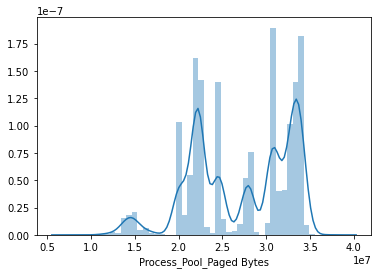

In [6]:
sns.distplot(numeric_features['Process_Pool_Paged Bytes'])

In [7]:
## DATA TRANSFOROMATION
## Z-score transformation
def compute_z_score(df):
    z_score_df = df.copy()
    for col in df.columns:
        z_score_df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    return z_score_df
## Min-Max transformation
def min_max_scaler(df):
    min_max_scaler_df = df.copy()
    for col in df.columns:
        min_max_scaler_df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    return min_max_scaler_df
## Yeo-Johnson transformation
def Yeo_Johnson(df):
    yj_df = df.copy()
    yj = PowerTransformer(method='yeo-johnson')
    for col in df.columns:
        yj_df[col] = yj.fit_transform(df[[col]])
    return yj_df


In [8]:
z_transformed_df = compute_z_score(numeric_features)
scaled_df = min_max_scaler(numeric_features)
yj_df = Yeo_Johnson(numeric_features)

/home/devworks/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/devworks/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/devworks/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/devworks/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/devworks/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/devworks/.local/lib/python3.6/site-packages/sklearn/pr

In [9]:
yj_df.head(2)

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,1.471561,-1.860198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.517563,0.0,0.0,-1.792361,0.0,-1.835825,-2.916424,0.0,0.0,0.0,0.0,0.0,0.005272,-2.033697,0.0,0.0,2.183165,-1.185172,2.633457,3.939219,-1.546613,0.0,-1.546614,-0.219742,-0.965331,-2.260141,-1.232272,-1.302884,3.939219,-0.914517,-0.665700,-0.633206,4.455903,4.455903,-0.642033,-0.332049,-1.548737,-1.587787,0.0,-1.196255,-0.103419,0.193306,-0.289279,0.034448,-0.668179
1,1.699241,-1.859890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.506650,0.0,0.0,-1.800531,0.0,-1.836229,-2.916424,0.0,0.0,0.0,0.0,0.0,0.005272,-2.033697,0.0,0.0,2.184255,-0.962054,2.633457,3.939219,-1.550615,0.0,-1.550615,-0.309404,-0.966529,-2.260141,-1.232272,-1.540410,3.939219,-0.914968,-0.662376,-0.638473,4.455903,4.455903,-0.642445,-0.332049,-1.548737,-1.410270,0.0,-1.161071,-0.096221,0.193306,-0.289279,0.034448,-0.668179


# Implementation of Genetic Algorithm


In [10]:
def get_population_fitness(equation_inputs, population):
    #This function gets the fitness score associated with each individual(solution) in the population. 
    fitness_score = np.sum(population*equation_inputs, axis=1)
    return fitness_score
def get_mating_pool(population, fitness_score, mating_parents):
    #This function will return the parents with the best fitness scores for mating to generate new populations
    parents = np.empty((mating_parents, population.shape[1]))
    for mating_parent in range(mating_parents):
        optimum_fitness_idx = np.where(fitness_score == np.max(fitness_score)) #location of the optimum fitness score
        optimum_fitness_idx = optimum_fitness_idx[0][0]
        parents[mating_parent, :] = population[optimum_fitness_idx, :] #getting the parents with optimum fitness scores
        fitness_score[optimum_fitness_idx] = -999
    return parents
def perform_crossover(parents, children_size):
    #this function implements the process of crossing over of genes from mating parents to form new children
    children = np.empty(children_size) #initiating the number of children
    cross_over_loc = np.uint8(children_size[1]/2) #getting the location where the crossover will happen in the children's genes. 
    for k in range(children_size[0]): #for all offsprings .... 
        parent1_idx = k%parents.shape[0] #selecting parent 1 for mating. 
        parent2_idx = (k+1)%parents.shape[0] #selecting the second mating parent
        children[k, 0:cross_over_loc] = parents[parent1_idx, 0:cross_over_loc] #taking the first set of genes from parent 1
        children[k, cross_over_loc:] = parents[parent2_idx, cross_over_loc:]
    return children
def perform_mutation(children_crossover_loc):
    #this function performs slight changes in the genetic structure of the offspring(mutating the genes) to make them different from parents
    for idx in range(children_crossover_loc.shape[0]):
        mutating_agent = np.random.uniform(-1.0, 1.0, 1) #creating a binary mutating agent for the offspring#note for simplicity, the agents are either 0, 1, -1
        children_crossover_loc[idx, 4] = children_crossover_loc[idx, 4] + mutating_agent #introducing the mutation to the genes of the children
        #also note that this mutation is occurring at a specific location in the genes of the children. it may be changed if need be. 
    return children_crossover_loc


In [11]:
z_transformed_df.head(2)

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,-0.089744,-2.071263,-0.372616,0.082361,-0.338808,-1.695232,3.975756,-0.338808,NaN,-1.695184,NaN,-0.227505,-1.472614,NaN,-1.710809,NaN,-1.885166,-2.69056,NaN,NaN,NaN,NaN,NaN,0.005272,-0.676047,NaN,NaN,3.210991,-0.693553,4.856388,2.249541,-1.157481,-0.085419,-1.157481,-0.560037,-0.966659,-0.944657,-0.839058,-0.915439,3.800533,-0.850359,-0.600737,-0.678490,3.231349,4.081136,-0.618895,-0.28663,-1.158159,-0.495129,-0.582915,-0.765146,-0.224882,0.027218,-0.250076,-0.013889,-0.668179
1,0.177993,-2.070812,-0.366373,0.082361,-0.339709,-1.695232,3.978911,-0.339709,NaN,-1.695184,NaN,-0.223901,-1.468689,NaN,-1.717829,NaN,-1.885606,-2.69056,NaN,NaN,NaN,NaN,NaN,0.005272,-0.676047,NaN,NaN,3.214439,-0.685216,4.856388,2.249541,-1.158959,-0.085419,-1.158959,-0.611780,-0.967796,-0.944657,-0.839058,-0.931667,3.800533,-0.850844,-0.600737,-0.681194,3.233599,4.082722,-0.619318,-0.28663,-1.158159,-0.484095,-0.583332,-0.751609,-0.217747,0.027218,-0.250076,-0.013889,-0.668179


In [12]:
numeric_features.head(2)

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,4,15446344,1185267712,5639348224,2536640512,1.120000e+14,9375539200,2536640512,0,1.120000e+14,0,2447032,1319534592,0,789,0,29996,0,0,0,0,0,0,1000000000,0,0,0,284635136,4018176,815652864,1466368,261980160,6444666880,255840,18944000,89763840,0,48,5668864,3825664,157052928,2957312.0,95240192,164783,122023,53.693804,12229087,249,962560,3460386816,17117184,83619840,82.156219,0,167984,0
1,9,15448880,1188397056,5639348224,2535768064,1.120000e+14,9379713024,2535768064,0,1.120000e+14,0,2451920,1322864640,0,787,0,29992,0,0,0,0,0,0,1000000000,0,0,0,284782592,7233536,815652864,1466368,261197824,6444666880,255076,16445440,89747456,0,48,2158592,3825664,157036544,2985984.0,94769152,164891,122068,53.687639,12229106,249,1376256,3459989504,17158144,83984384,82.156219,0,167984,0


In [13]:
scaled_df.head(2)
#scaled_df = scaled_df.dropna()
scaled_df.head()

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,0.020513,0.254279,0.347702,0.509926,0.274078,0.125998,0.676939,0.274078,NaN,0.125998,NaN,0.016574,0.142423,NaN,0.054190,NaN,0.227913,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.474041,0.001572,1.0,0.409611,0.089327,0.309638,0.089327,0.023806,0.335761,0.0,0.003126,0.005038,0.865616,0.607586,1.680291e-07,0.069145,0.258663,0.438832,0.386306,0.000017,0.089318,0.001114,0.191387,0.040099,0.180379,0.125954,0.0,0.121252,0.0
1,0.046154,0.254362,0.348839,0.509926,0.273947,0.125998,0.677290,0.273947,NaN,0.125998,NaN,0.016630,0.143232,NaN,0.052930,NaN,0.227830,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.474401,0.002831,1.0,0.409611,0.089055,0.309638,0.089055,0.020587,0.335599,0.0,0.003126,0.001918,0.865616,0.607523,1.696582e-07,0.068803,0.258832,0.438994,0.386221,0.000017,0.089318,0.001592,0.191353,0.042339,0.181282,0.125954,0.0,0.121252,0.0
2,0.025641,0.253176,0.399214,0.509926,0.283622,0.125998,0.677290,0.283622,NaN,0.125998,NaN,0.016131,0.164901,NaN,0.053560,NaN,0.227809,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.474630,0.004443,1.0,0.351259,0.050127,0.309638,0.050127,0.017468,0.335559,0.0,0.002987,0.000127,0.865616,0.440210,1.198545e-07,0.017304,0.256440,0.435391,0.399827,0.000017,0.050310,0.000863,0.196670,0.042339,0.169141,0.125954,0.0,0.121252,0.0
3,0.061538,0.250397,0.380783,0.526671,0.309428,0.125998,0.701116,0.309428,NaN,0.125998,NaN,0.015108,0.142030,NaN,0.052300,NaN,0.227809,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.468464,0.077217,1.0,0.308924,0.089738,0.309638,0.089738,0.006243,0.358218,0.0,0.001806,0.000197,0.865616,0.008038,1.019345e-07,0.045849,0.250814,0.431050,0.435600,0.000017,0.089683,0.000014,0.210647,0.040099,0.102416,0.125954,0.0,0.121252,0.0
4,0.061538,0.248167,0.332099,0.544670,0.309306,0.125998,0.716525,0.309306,NaN,0.125998,NaN,0.014312,0.105151,NaN,0.061122,NaN,0.228225,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.468254,0.131015,1.0,0.251716,0.137885,0.309638,0.137885,0.002480,0.372137,0.0,0.001945,0.010701,0.865616,0.007593,8.285091e-08,0.038088,0.250364,0.460399,0.435576,0.000017,0.138170,0.038407,0.210638,0.042339,0.045741,0.125954,0.0,0.121252,0.0


In [14]:
yj_df.head(2)

,Processor_DPC_Rate,Process_Pool_Paged Bytes,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_Page_File Bytes,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_Private_Bytes,Process_Elapsed_Time,Process_Virtual_Bytes,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_ID Process,Process_Thread Count,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Available KBytes,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pool Paged Resident Bytes,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Free Megabytes,label
0,1.471561,-1.860198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.517563,0.0,0.0,-1.792361,0.0,-1.835825,-2.916424,0.0,0.0,0.0,0.0,0.0,0.005272,-2.033697,0.0,0.0,2.183165,-1.185172,2.633457,3.939219,-1.546613,0.0,-1.546614,-0.219742,-0.965331,-2.260141,-1.232272,-1.302884,3.939219,-0.914517,-0.665700,-0.633206,4.455903,4.455903,-0.642033,-0.332049,-1.548737,-1.587787,0.0,-1.196255,-0.103419,0.193306,-0.289279,0.034448,-0.668179
1,1.699241,-1.859890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.506650,0.0,0.0,-1.800531,0.0,-1.836229,-2.916424,0.0,0.0,0.0,0.0,0.0,0.005272,-2.033697,0.0,0.0,2.184255,-0.962054,2.633457,3.939219,-1.550615,0.0,-1.550615,-0.309404,-0.966529,-2.260141,-1.232272,-1.540410,3.939219,-0.914968,-0.662376,-0.638473,4.455903,4.455903,-0.642445,-0.332049,-1.548737,-1.410270,0.0,-1.161071,-0.096221,0.193306,-0.289279,0.034448,-0.668179


In [15]:
X_original = numeric_features.values
X_z_score = z_transformed_df.values
X_scaled = scaled_df.values
X_yj = yj_df.values
equation_inputs = X_original # features to be optimized. 
num_weights = X_original.shape[1]
solutions_per_population = X_original.shape[0]
num_mating_parents = 4 #should be a variable

population_size = (solutions_per_population, num_weights)
#creating an initial njew populating from which the mating parents will be selected from. 
#we choose the bounds arbitrarily. This choice is also a variable to be experimented with. 
new_pop = np.random.uniform(low=0, high=1, size=population_size)
#initializing the number of generations over which the algorithm should evolve
generations = 10
for generation in range(generations):
    print("Generation: ", generation)
    fitness_score = get_population_fitness(equation_inputs, new_pop)
    parents = get_mating_pool(new_pop, fitness_score, num_mating_parents)
    children = perform_crossover(parents, children_size =(population_size[0]-parents.shape[0], num_weights))
    children_mutation = perform_mutation(children)
    #creating a new population consisting of both parents and children
    new_pop[0:parents.shape[0], :] = parents
    new_pop[parents.shape[0]:, :] = children_mutation
    #printing the  best result for the specific generation
    print("Optimum fitness score for generation ", str(generation) + ":" + str(np.max(np.sum(new_pop*equation_inputs, axis=1))))
#Final results 
fitness_score = get_population_fitness(equation_inputs, new_pop)
best_fitness_idx = np.where(fitness_score == np.max(fitness_score))
print("Best weights: ", new_pop[best_fitness_idx, :])
print("Best fitness score: ", fitness_score[best_fitness_idx])

Generation:  0
Optimum fitness score for generation  0:614023122084359.0
Generation:  1
Optimum fitness score for generation  1:614023542567011.6
Generation:  2
Optimum fitness score for generation  2:614025760086111.5
Generation:  3
Optimum fitness score for generation  3:614025555109871.1
Generation:  4
Optimum fitness score for generation  4:614027342233984.5
Generation:  5
Optimum fitness score for generation  5:614027926139581.0
Generation:  6
Optimum fitness score for generation  6:614029911842575.4
Generation:  7
Optimum fitness score for generation  7:614029994048377.5
Generation:  8
Optimum fitness score for generation  8:614031528591852.8
Generation:  9
Optimum fitness score for generation  9:614032676928141.8
Best weights:  [[[0.82592192 0.43923555 0.27629048 0.25875856 5.33121569 0.99169354
   0.86700345 0.18710079 0.02811936 0.99538207 0.42037619 0.35522112
   0.09830153 0.54010071 0.09965477 0.86118187 0.94673348 0.47615123
   0.07720729 0.66498855 0.99599124 0.3837964  0

In [16]:
ga_default_weights = [0.83497261, 0.73830285,  0.86233258,  0.90585603, -2.34443966,
    0.99847625,  0.28103998,  0.16044484,  0.51499031,  0.91156127,
    0.26774035 , 0.16835523,  0.71886166,  0.0521329,   0.79959617,
    0.32452838,  0.85079857,  0.97142437 , 0.08361378,  0.06484021,
    0.31680778 , 0.73871826,  0.24511596,  0.28018466,  0.32462631,
    0.07263309 , 0.36625635,  0.96851283,  0.12206696,  0.01154327,
    0.72034136,  0.27596387,  0.23385775,  0.49342528,  0.3586158,
    0.56597453 , 0.19002812,  0.06846207,  0.56914958,  0.2453737,
    0.30420244 , 0.03913568,  0.97065528,  0.19847651,  0.31010126,
    0.25992413,  0.39675327,  0.47725825,  0.99352773,  0.48695309,
    0.41817801 , 0.13928387,  0.02878369,  0.18204388,  0.67935677,
    0.06543073]

# Extreme Learning Machine 

##  Basic intuition.
* $y_i = \sum_{i=1}^h  \beta_i g(w_i x_j + b_i)$, 
where h = number of hidden neurons, 
g = neuron activation function, 
w = vector of input layer weights
x = input data
b = bias term
y_i = prediction. 
$\beta$ = output layer weight. 
* Input layer weights in ELM are randomly assigned and remain untuned throughout the training process. 
* The assignment is commonly done using the normal distribution approach or uniform approach distribution both covered in this implementation. 
* We introduce a new weight assignment method, weights from the genetic algorithm implementation obtained above. 
## What sets the ELM apart?
* The $\beta$ parameter of the ELM is obtained from the generalized inverse(Moore-Penrose inverse) of the output layer matrix. 
* This aspect makes the ELM relatively fast. 
* Source: https://www.sciencedirect.com/science/article/abs/pii/B9780444634283503398


## To do:
    * Experiment with different variables in the ELM equation above. 

In [34]:
class ELM():
    '''
    Implementation of the novel Extreme Learning Machine Algorithm from scratch using numpy and scipy. 
    Brief Overview:
    ELM is a single layer feed forward neural network that has significantly high performance. 
    The algorithm has few tunable parameters, with weights allocated at random remaining fixed throughout the iterative process. 
    The "wow-factor" in ELMs is the Moore-Penrose inverse gradient calculation. 
    This implementation caters for both regression and classification tasks using different kinds of activation functions. 
    
    Parameters
    =============================================================
    shape:: list of dimensions [hidden units, output_units]
    activation function:  choice of activation function for the hidden layer. Choices = { sigmoid, relu, sin, tanh, leaky_relu}
    X: features from which the model will learn. Array
    y: target variable to be output by the model. Array
    C: Regularization parameter, important for the regulation of model overfitting. 
    alg_type: The prediction task of the algorithm: Choices = {classifier, regressor}
    one_hot: Target encoding for classification tasks. It is set to true for data types that have to be transformed to encoded formats.
    weight_randomization_method: the approach used to set the weights for the ELM model. Choices = {normal, uniform, EA}
    '''
    def __init__(self, hidden_units, activation_function, X, y,C, alg_type, weight_randomization_method, one_hot=True):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.X = X
        self.y = y
        self.C = C
        self.n_labels = np.unique(self.y).shape[0]
        self.beta = np.zeros(self.hidden_units, self.n_labels) 
        self.alg_type = alg_type
        self.one_hot = one_hot
        #One-Hot encoding function for classification tasks
        if self.alg_type == "classifier" and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0],self.n_labels))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1
        # Generation of weighgts and bias matrices to be used to transform the input to the hidden layer. 
        # Random weight generation is done using normal and uniform distributions. 
        # The third weight optimization approach is the use of weights from the genetic algorithm above. 
        if self.weight_randomization_method == "uniform":
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.X.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size = (self.hidden_units, 1))
        if self.weight_randomization_method == "normal":
            self.W = np.arandom.normal(loc=0, scale=0.5, size=(self.hidden_units, self.X.shape[1]))
            self.b = np.random.normal(loc = 0, scale = 0.5, size=(self.hidden_units, 1))
        if self.weight_randomization_method == "EA":
            self.W = ga_default_weights
            self.b = np.random.normal(loc = 0, scale=0.5, size = (self.hidden_units, 1))
        
            
    def _input2hidden(self, X):
        '''
        A helper function that computes the output of the hidden layer. 
        The function's core principle is y_predicted = weights*features + bias
        The result of this equation is then passed through an activation function that the user selects
        
        '''
        self.temp_output = np.dot(self.W, X.T)+self.b #y = wx+b
        if self.activation_function == "sigmoid":
            self.output = 1/(1+np.exp(-self.temp_output))
        if self.activation_function == "relu":
            self.output = self.temp_output*(self.temp_output > 0)
        if self.activation_function == "sin":
            self.output = np.sin(self.temp_output)
        if self.activation_function == "tanh":
            self.output = (np.exp(self.temp_output) - np.exp(-self.temp_output))/(np.exp(self.temp_output) + np.exp(-self.temp_output))
        if self.activation_function == "leaky_relu":
            self.output = np.max(0, self.temp_output) + 0.1* np.minimum(0, self.temp_output)
        return self.output
    def _hidden2output(self, H):
        #Helper function that gets the dot product between beta and the Moore-Penrose generalized inverse result of the output from hidden layer
        self.hidden_output = np.dot(H.T, self.beta)
        return self.hidden_output 
    

    def fit(self, algorithm_type):
        '''
        Function that fits the ELM model on the output of the _input2hidden helper function above. 
        The fitting is done by computing the Moore-Penrose inverse on the output of _input2hidden and the target variables
        
        '''
        self.output = self._input2hidden(self.X)
        if self.alg_type == "classifier":
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        #Note there's no transformation for regression tasks
        if self.funct == "regressor":
            self.y_temp = self.y
        
        #Fitting the model without any regularization parameters
        if algorithm == "no_regularization":
            self.beta = np.dot(pinv2(self.output.T), self.y_temp)
        # Using regularization
        if algorithm == "solution1":
            self.tmp1 = inv(np.eye(self.output.shape[0])/self.C + np.dot(self.output, self.output.T))
            self.tmp2 = np.dot(self.tmp1, self.output)
            self.beta = np.dot(self.tmp2, self.y_temp)
            
        #Finding the predicted output
        self.predicted_result = self._hidden2input(self.output)
        # For classification tasks, the results above are passed through a softmax activation function to determine their category. For regression, the results remain as thet are
        if self.alg_type == "classifier":
            self.predicted_result = np.exp(self.predicted_result)/np.sum(np.exp(self.predicted_result), axis=1).reshape(-1,1)
        #We compare the performance of the model under different parameters using the accuracy metric for classification. Regression tasks will be evaluated using the RMSE score
        if self.alg_type == "classifier":
            self.y_ = np.where(self.predicted_result == np.max(self.predicted_results, axis=1)).reshape(-1,1).shape[1] #indices of the predictions
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        
        if self.alg_type == "regressor":
            self.train_score = np.sqrt(np.sum((self.predicted_result-self.y)**2)/self.y.shape[0])
            
        return self.beta, self.train_score
    def predict(self, X):
        '''
        Performs predictions given new data
        '''
        self.output = self._input2hidden(X)
        self.y_ = self._hidden2output(self.output)
        if self.alg_type == "classifier":
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).resape(-1,1))[1]
            
        return self.y_
    
    def evaluate_model(self,X, y):
        self.prediction = self.predict(X)
        if self.alg_type == "classifier":
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.validation_score = self.correct/y.shape[0]
        if self.alg_type == "regressor":
            self.validation_score = np.sqrt(np.sum((self.prediction-self.y)**2)/self.y.shape[0])
        
    
            
    
    
    

            
                                                                                 
            
            

In [35]:
numeric_features['target'] = windows_10_df['type'].values

In [36]:
numeric_features = numeric_features.sample(frac=1)
sample_data = numeric_features.head(1000) # experimenting with the first 1000 random observations

In [37]:
le = LabelEncoder()
sample_data['target'] = le.fit_transform(sample_data['target'])

/home/devworks/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
X = sample_data.drop(columns = ['target'], axis=1)
y = sample_data[['target']]
#Performing min_max scaling on the features
X_sc = MinMaxScaler().fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.3, random_state=42)

In [40]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)


In [41]:
class elm():
    '''
    Function: elm class init
    -------------------
    Parameters:
    shape: list, shape[hidden units, output units]
        numbers of hidden units and output units
    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'
        Activation function of neurals
    x: array, shape[samples, features]
        train data
    y: array, shape[samples, ]
        labels
    C: float
        regularization parameter
    elm_type: str, 'clf' or 'reg'
        'clf' means ELM solve classification problems, 'reg' means ELM solve regression problems.
    one_hot: bool, Ture or False, default True 
        The parameter is useful only when elm_type == 'clf'. If the labels need to transformed to
        one_hot, this parameter is set to be True
    random_type: str, 'uniform' or 'normal', default:'normal'
        Weight initialization method
    '''
    def __init__(self, hidden_units, activation_function,  x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]     
        self.beta = np.zeros((self.hidden_units, self.class_num))   
        self.elm_type = elm_type
        self.one_hot = one_hot

        # if classification problem and one_hot == True
        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))
        if self.random_type == "GA":
            self.W = ga_default_weights
            self.b = np.random.normal(loc=0, scale=0.4, size=(self_hidden_units, 1))

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1/(1 + np.exp(- self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH))/(np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''
    def fit(self, algorithm):
        self.time1 = time.clock()   # compute running time
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y
        # no regularization
        if algorithm == 'no_re':
            self.beta = np.dot(pinv2(self.H.T), self.y_temp)
        # faster algorithm 1
        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.clock()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        if self.elm_type == 'clf':
            self.result = np.exp(self.result)/np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''
    def predict(self, x):
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''
    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct/y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])

        return self.test_score
    ## For evolutionary strategies
    def get_weights(self):
        return self.W

    def set_weights(self, weights):
        self.weights = self.W

    def save(self, filename='weights.pkl'):
        with open(filename, 'wb') as fp:
            pickle.dump(self.weights, fp)

    def load(self, filename='weights.pkl'):
        with open(filename, 'rb') as fp:
            self.weights = pickle.load(fp)

In [42]:
model = elm(hidden_units=32, activation_function='relu', random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)

classifier beta:
 [[ 1.46392138e-01 -5.70813793e-03 -1.21346977e-02  2.29468391e-01
   5.50331124e-02  9.95679018e-03  5.12860002e-02]
 [-1.18514719e-02  1.57097417e-03 -2.80480371e-04 -3.86708495e-02
   2.69289610e-02  7.47062557e-04 -4.91463714e-02]
 [-1.42354113e-02  3.16378233e-03 -3.07030281e-03  5.83671841e-02
  -5.90150772e-03 -1.95541243e-03 -6.08369318e-02]
 [ 1.18335920e-03  2.78777710e-04  2.88633768e-04 -9.82176329e-04
   1.39024605e-03  3.54036169e-04 -1.47366916e-03]
 [ 2.55444202e-03 -5.69531296e-03  1.22652846e-02  8.55247364e-02
  -1.60517165e-02 -6.78391321e-03 -2.62467603e-02]
 [-7.80976846e-02 -4.04996482e-03  4.46276271e-03 -1.01301757e-01
   2.55265609e-02  4.11421680e-03  4.15026725e-02]
 [ 8.97757815e-03 -1.80072458e-03  2.16818185e-02 -5.16167657e-02
  -8.42452030e-03  1.30270937e-03  1.07458785e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.76803364e-03 -1.00116159e-03 -8.86819258e

# Evolutionary Strategies.

In [25]:
def worker_process(arg):
    get_reward_func, weights = arg
    return get_reward_func(weights)


class EvolutionStrategy(object):
    def __init__(self, weights, get_reward_func, population_size=50, sigma=0.1, learning_rate=0.03, decay=0.999,
                 num_threads=1):

        self.weights = weights
        self.get_reward = get_reward_func
        self.POPULATION_SIZE = population_size
        self.SIGMA = sigma
        self.learning_rate = learning_rate
        self.decay = decay
        self.num_threads = mp.cpu_count() if num_threads == -1 else num_threads

    def _get_weights_try(self, w, p):
        weights_try = []
        for index, i in enumerate(p):
            jittered = self.SIGMA * i
            weights_try.append(w[index] + jittered)
        return weights_try

    def get_weights(self):
        return self.weights

    def _get_population(self):
        population = []
        for i in range(self.POPULATION_SIZE):
            x = []
            for w in self.weights:
                x.append(np.random.randn(*w.shape))
            population.append(x)
        return population

    def _get_rewards(self, pool, population):
        if pool is not None:
            worker_args = ((self.get_reward, self._get_weights_try(self.weights, p)) for p in population)
            rewards = pool.map(worker_process, worker_args)

        else:
            rewards = []
            for p in population:
                weights_try = self._get_weights_try(self.weights, p)
                rewards.append(self.get_reward(weights_try))
        rewards = np.array(rewards)
        return rewards

    def _update_weights(self, rewards, population):
        std = rewards.std()
        if std == 0:
            return
        rewards = (rewards - rewards.mean()) / std
        for index, w in enumerate(self.weights):
            layer_population = np.array([p[index] for p in population])
            update_factor = self.learning_rate / (self.POPULATION_SIZE * self.SIGMA)
            self.weights[index] = w + update_factor * np.dot(layer_population.T, rewards).T
        self.learning_rate *= self.decay

    def run(self, iterations, print_step=10):
        pool = mp.Pool(self.num_threads) if self.num_threads > 1 else None
        for iteration in range(iterations):

            population = self._get_population()
            rewards = self._get_rewards(pool, population)

            self._update_weights(rewards, population)

            if (iteration + 1) % print_step == 0:
                print('iter %d. reward: %f' % (iteration + 1, self.get_reward(self.weights)))
        if pool is not None:
            pool.close()
            pool.join()

In [29]:
inp = np.array(X_train)
sol = np.array(y_train)

In [32]:
def get_reward(weights):
    global sol, model, inp
    model.set_weights(weights)
    prediction = model.predict(inp)
    # here our best reward is zero
    reward = -np.sum(np.square(sol - prediction))
    return reward

In [33]:
es = EvolutionStrategy(model.get_weights(), get_reward, population_size=20, sigma=0.1, learning_rate=0.03, decay=0.995, num_threads=1)
es.run(1000, print_step=100)

iter 100. reward: -1862048.000000
iter 200. reward: -1862048.000000
iter 300. reward: -1862048.000000
iter 400. reward: -1862048.000000
iter 500. reward: -1862048.000000
iter 600. reward: -1862048.000000
iter 700. reward: -1862048.000000
iter 800. reward: -1862048.000000
iter 900. reward: -1862048.000000
iter 1000. reward: -1862048.000000
